# Random Forest Model

RF model to be used for predicting protein coding genes in DNA sequences.

**Random Search with CV**
- bootstrap': False
- max_depth': 20
- max_features': 'auto'
- min_samples_leaf': 1
- min_samples_split': 2
- n_estimators': 1000
 
**Grid Search with CV**
- bootstrap': False
- max_depth': 40
- max_features': 3
- min_samples_leaf': 1
- min_samples_split': 2
- n_estimators': 2000

BEST MODEL:
- Random Search with CV - BUT
- n_estimators': 200
- n_features: 200

## Import packages and choose data

In [1]:
# Preprocessing and encoding variables
import pandas as pd
import numpy as np
from random import sample

# Using Skicit-learn to split data into training and testing sets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Visualising feature importance and making plots
import matplotlib.pyplot as plt
import seaborn as sns

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Confusion matrix
from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, roc_auc_score

### Prediction of genomes from same species but different strain

In [ ]:
# Both genomes from E.coli species, but different strain
G11 = pd.read_csv('../input/genomespart2/G11.features.csv').iloc[:, 1:]
G12 = pd.read_csv('../input/genomespart2/G12.features.csv').iloc[:, 1:]

In [ ]:
frames = [G11, G12]
e_coli = pd.concat(frames)
e_coli.tail(10)

### Prediction of genomes from different species 

In [ ]:
# Average genomes from different species
G11 = pd.read_csv('../input/genomespart2/G11.features.csv').iloc[:, 1:]
G13 = pd.read_csv('../input/genomespart2/G13.features.csv').iloc[:, 1:]

In [ ]:
frames = [G11, G13]
diff = pd.concat(frames)
diff.tail(10)

### Combining 5 genomes

In [2]:
G1 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G1.features.csv').iloc[:, 1:]
G2 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G2.features.csv').iloc[:, 1:]
G3 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G3.features.csv').iloc[:, 1:]
G4 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G4.features.csv').iloc[:, 1:]
G5 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G5.features.csv').iloc[:, 1:]

In [47]:
G1 = G1.sample(800)
G2 = G2.sample(800)
G3 = G3.sample(800)
G4 = G4.sample(800)
G5 = G5.sample(800)

In [45]:
G6 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G6.features.csv').iloc[:, 1:]
G7 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G7.features.csv').iloc[:, 1:]
G8 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G8.features.csv').iloc[:, 1:]
G9 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G9.features.csv').iloc[:, 1:]
G10 = pd.read_csv('~/Documents/NMBU/Semester 12/Data Science Master/data-science-thesis/data_expo/G10.features.csv').iloc[:, 1:]

In [49]:
G6 = G6.sample(800)
G7 = G7.sample(800)
G8 = G8.sample(800)
G9 = G9.sample(800)
G10 = G10.sample(800)

In [50]:
frames = [G1, G2, G3, G4, G5, G6, G7, G8, G9, G10]
df = pd.concat(frames)
df.tail(10)

,Type,Length,Dataset,Genome,GC_content,GC1_content,GC2_content,GC3_content,Start_ATG,Start_GTG,...,c_weight_TCG,c_weight_TCT,c_weight_TGA,c_weight_TGC,c_weight_TGG,c_weight_TGT,c_weight_TTA,c_weight_TTC,c_weight_TTG,c_weight_TTT
1849,CDS,201,1,Chlamydia trachomatis,0.363184,0.492537,0.253731,0.343284,1,0,...,0.166667,0.000000,0.0,0.666667,0,0.333333,0.400000,0.000000,0.000000,1.000000
5250,CDS,1518,1,Chlamydia trachomatis,0.301054,0.407115,0.290514,0.205534,1,0,...,0.093750,0.062500,0.0,0.000000,1,1.000000,0.673913,0.250000,0.173913,0.750000
2785,LORF,291,2,Chlamydia trachomatis,0.402062,0.412371,0.608247,0.185567,0,0,...,0.062500,0.375000,1.0,0.000000,1,1.000000,0.250000,0.000000,0.125000,1.000000
3291,CDS,387,1,Chlamydia trachomatis,0.260982,0.387597,0.217054,0.178295,1,0,...,0.200000,0.000000,0.0,0.000000,0,1.000000,0.384615,0.000000,0.153846,1.000000
1636,LORF,171,2,Chlamydia trachomatis,0.385965,0.385965,0.263158,0.508772,0,0,...,0.000000,0.500000,0.0,0.500000,1,0.500000,0.125000,0.800000,0.375000,0.200000
3106,LORF,345,1,Chlamydia trachomatis,0.376812,0.400000,0.521739,0.208696,0,1,...,0.062500,0.250000,1.0,0.250000,1,0.750000,0.200000,0.142857,0.000000,0.857143
242,LORF,57,1,Chlamydia trachomatis,0.210526,0.263158,0.105263,0.263158,0,0,...,0.000000,0.000000,0.0,0.000000,0,0.000000,1.000000,1.000000,0.000000,0.000000
1750,LORF,192,2,Chlamydia trachomatis,0.296875,0.265625,0.250000,0.375000,0,0,...,0.000000,0.200000,0.0,0.000000,1,1.000000,0.000000,0.181818,0.500000,0.818182
5282,CDS,1578,1,Chlamydia trachomatis,0.357414,0.482890,0.351711,0.237643,1,0,...,0.000000,0.241379,0.0,0.000000,1,1.000000,0.574468,0.333333,0.170213,0.666667
368,LORF,63,2,Chlamydia trachomatis,0.301587,0.142857,0.238095,0.523810,0,0,...,0.000000,0.000000,0.0,1.000000,0,0.000000,0.000000,0.333333,0.000000,0.666667


## Pre-processing / Data preparation

1. One-hot encoded categorical variables
2. Split data into features and labels
3. Convert to arrays
4. Split data into training and testing sets

In [51]:
G = df
print('The shape of our dataframe is:', G.shape)

The shape of our dataframe is: (8000, 14791)


In [52]:
G = G.dropna()

In [53]:
print('The shape of our dataframe is:', G.shape)

The shape of our dataframe is: (8000, 14791)


### Encoding target values

In [54]:
def encode_feature(array):
    """ Encode a categorical array into a number array
    
    :param array: array to be encoded
    :return: numerical array
    """
  
    encoder = preprocessing.LabelEncoder()
    encoder.fit(array)
    return encoder.transform(array)

In [55]:
class_names = ['CDS', 'LORF']
targets = G["Type"].values
print(targets)

['LORF' 'CDS' 'CDS' ... 'LORF' 'CDS' 'LORF']


In [56]:
targets = encode_feature(targets)
print(targets)

[1 0 0 ... 1 0 1]


In [57]:
print('The shape of our dataframe is:', G.shape)
print('Rows:', G.shape[0])
print('Columns:', G.shape[1])

The shape of our dataframe is: (8000, 14791)
Rows: 8000
Columns: 14791


### Selecting features and targets and converting data to arrays

In [58]:
# Labels are the values we want to predict
labels = targets

# Remove the labels from the features -> axis 1 refers to the columns
features = G.drop(['Type','Genome', 'Dataset'], axis = 1)

# Saving feature names as list for later use
feature_names = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [59]:
print('The shape of our features are:', features.shape)

The shape of our features are: (8000, 14788)


### Split into training and testing sets

In [60]:
# Split the data into training and testing sets -> x = features and y = labels/targets
train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [61]:
print('Training Features Shape:', train_x.shape)
print('Training Labels Shape:', train_y.shape)
print('Testing Features Shape:', test_x.shape)
print('Testing Labels Shape:', test_y.shape)

Training Features Shape: (6000, 14788)
Training Labels Shape: (6000,)
Testing Features Shape: (2000, 14788)
Testing Labels Shape: (2000,)


## Train model - default Rand Forest

**RandomForestClassifier**(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [91]:
# Create a Gaussian Classifier
clf = RandomForestClassifier(random_state = 42, n_jobs=-1)

# Train the model using the training sets
clf.fit(train_x, train_y)

RandomForestClassifier(n_jobs=-1, random_state=42)

### Make predictions on test set

In [92]:
pred_y = clf.predict(test_x)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_y, pred_y))

Accuracy: 0.883


## Hyperparametertuning

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 70, num = 10)]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}

print(random_grid)

In [ ]:
# Random search of parameters, using 3 fold cross validation
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 10,
                               cv = 3, verbose=2, random_state=42, n_jobs = -1, return_train_score=True)

# Fit the random search model
clf_random.fit(train_x, train_y);

In [ ]:
clf_random.best_params_

### Make predictions on test set

In [ ]:
pred_y = clf_random.predict(test_x)

# Model Accuracy, how often is the classifier correct?
print("Accuracy after random search:",metrics.accuracy_score(test_y, pred_y))

### Evaluate functions

In [ ]:
def evaluate(model, test_features, test_lables):
    predictions = model.predict(test_features)
    accuracy = metrics.accuracy_score(test_lables, predictions)
    print('Model Performance')
    print('Accuracy = {:0.4f}%.'.format(accuracy))
    return accuracy

#### Default model

In [ ]:
base_accuracy = evaluate(clf, test_x, test_y)

#### Best random search model

In [ ]:
best_random = clf_random.best_estimator_
random_accuracy = evaluate(best_random, test_x, test_y)

In [ ]:
print('Improvement of {:0.3f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

## Train model - best params RandomSearch

In [62]:
# Create a Gaussian Classifier
clf_rand = RandomForestClassifier(n_estimators=200, max_features='auto', max_depth=20, bootstrap=False, random_state = 42)

# Train the model using the training sets
clf_rand.fit(train_x, train_y)

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=200,
                       random_state=42)

## Make predictions on test set

In [63]:
pred_y = clf_rand.predict(test_x)

# Model Accuracy, how often is the classifier correct?
print("Accuracy score:", metrics.accuracy_score(test_y, pred_y))

# Precision, Recall and Roc_AUC score
#print("Precision score:", metrics.precision_score(test_y, pred_y))
#print("Recall score:", metrics.recall_score(test_y, pred_y))
#print("ROC_AUC score:", metrics.roc_auc_score(test_y, pred_y))

Accuracy score: 0.89


## Confusion matrix

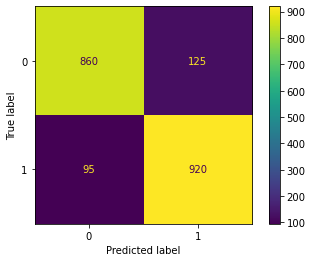

In [64]:
plot_confusion_matrix(clf_rand, test_x, test_y)  
plt.show()

#plt.savefig('confmatrix_g1_uneven.png', dpi=300, bbox_inches='tight', transparent=True)

## Finding important features

1. Create a random forests model.
2. Use the feature importance variable to see feature importance scores.
3. Visualize these scores using the seaborn library.

In [65]:
feature_imp = pd.Series(clf_rand.feature_importances_, index = feature_names).sort_values(ascending=False)

In [66]:
features = feature_imp.to_frame()
features.columns = ['Feature importance']

In [67]:
features

,Feature importance
Length,0.013167
1_aa_mer_E,0.008414
Start_ATG,0.008367
2_aa_mer_LE,0.008157
2_aa_mer_EL,0.007774
...,...
3_aa_mer_FS*,0.000000
3_aa_mer_QYR,0.000000
3_aa_mer_QY*,0.000000
3_aa_mer_Q*A,0.000000


In [68]:
# Grouping all k-mers
dimers = features[features.index.map(lambda x: "2_mer_" in x)]
trimers = features[features.index.map(lambda x: "3_mer_" in x)]
tetramers = features[features.index.map(lambda x: "4_mer_" in x)]
pentamers = features[features.index.map(lambda x: "5_mer_" in x)] 
hexamers = features[features.index.map(lambda x: "6_mer_" in x)]

# Grouping all aa-mers
single_aa = features[features.index.map(lambda x: "1_aa_mer_" in x)]
double_aa = features[features.index.map(lambda x: "2_aa_mer_" in x)]
triple_aa = features[features.index.map(lambda x: "3_aa_mer_" in x)]

# Grouping c_weights
c_weight = features[features.index.map(lambda x: "c_weight" in x)]

#### Mean feature importances of all k-mers, aa-mers and c_weights

In [69]:
data = {'Feature importance': [round(dimers.mean().iloc[0], 6), round(trimers.mean().iloc[0], 6), 
                               round(tetramers.mean().iloc[0], 6), round(pentamers.mean().iloc[0], 6), 
                               round(hexamers.mean().iloc[0], 6), round(single_aa.mean().iloc[0], 6), 
                               round(double_aa.mean().iloc[0], 6), round(triple_aa.mean().iloc[0], 6),
                               round(c_weight.mean().iloc[0], 6)]}

features_cond = pd.DataFrame(data, index = ['dimers', 'trimers', 'tetramers', 'pentamers', 'hexamers', 
                                            'single_aa', 'double_aa', 'triple_aa', 'c_weight'])

#### Sum of all feature importances of k-mers, aa-mers and c_weights

In [70]:
data = {'Feature importance': [round(dimers.sum().iloc[0], 6), round(trimers.sum().iloc[0], 6), 
                               round(tetramers.sum().iloc[0], 6), round(pentamers.sum().iloc[0], 6), 
                               round(hexamers.sum().iloc[0], 6), round(single_aa.sum().iloc[0], 6), 
                               round(double_aa.sum().iloc[0], 6), round(triple_aa.sum().iloc[0], 6),
                               round(c_weight.sum().iloc[0], 6)]}

features_cond2 = pd.DataFrame(data, index = ['dimers', 'trimers', 'tetramers', 'pentamers', 'hexamers', 
                                            'single_aa', 'double_aa', 'triple_aa', 'c_weight'])

In [71]:
features_cond

,Feature importance
dimers,0.000561
trimers,0.000476
tetramers,0.000498
pentamers,0.000239
hexamers,0.000048
single_aa,0.002071
double_aa,0.000422
triple_aa,0.000010
c_weight,0.000829


In [72]:
ind_list = ['GC_content', 'GC1_content', 'GC2_content', 'GC3_content', 
            'Start_ATG', 'Start_GTG', 'Start_TTG', 'Length']

features_condensed = features.loc[ind_list]

In [73]:
features_condensed

,Feature importance
GC_content,0.000467
GC1_content,0.002658
GC2_content,0.004380
GC3_content,0.001272
Start_ATG,0.008367
Start_GTG,0.000291
Start_TTG,0.002867
Length,0.013167


In [74]:
features_red = pd.concat([features_condensed, features_cond])
features_red = features_red.squeeze()

In [75]:
features_red = features_red.sort_values(ascending=False)
features_red

Length         0.013167
Start_ATG      0.008367
GC2_content    0.004380
Start_TTG      0.002867
GC1_content    0.002658
single_aa      0.002071
GC3_content    0.001272
c_weight       0.000829
dimers         0.000561
tetramers      0.000498
trimers        0.000476
GC_content     0.000467
double_aa      0.000422
Start_GTG      0.000291
pentamers      0.000239
hexamers       0.000048
triple_aa      0.000010
Name: Feature importance, dtype: float64

In [76]:
features_red2 = pd.concat([features_condensed, features_cond2])
features_red2 = features_red2.squeeze()

In [77]:
features_red2 = features_red2.sort_values(ascending=False)
features_red2

pentamers      0.244293
hexamers       0.195580
double_aa      0.177355
tetramers      0.127610
triple_aa      0.087779
c_weight       0.053043
single_aa      0.041420
trimers        0.030477
Length         0.013167
dimers         0.008974
Start_ATG      0.008367
GC2_content    0.004380
Start_TTG      0.002867
GC1_content    0.002658
GC3_content    0.001272
GC_content     0.000467
Start_GTG      0.000291
Name: Feature importance, dtype: float64

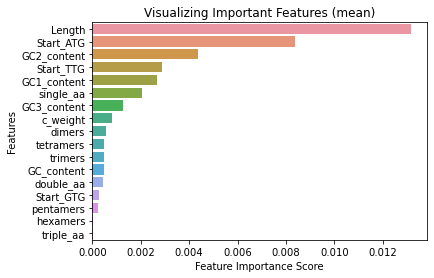

In [78]:
%matplotlib inline

# Creating a bar plot
sns.barplot(x = features_red, y = features_red.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features (mean)")
#plt.legend(features_red.index, loc ="lower right", fontsize='x-small')
plt.show()

#plt.savefig('feature_imp_g1_agr_mean_uneven.png', dpi=300, bbox_inches='tight', transparent=True)

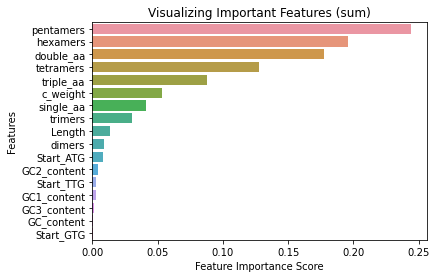

In [79]:
%matplotlib inline

# Creating a bar plot
sns.barplot(x = features_red2, y = features_red2.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features (sum)")
#plt.legend(features_red.index, loc ="lower right", fontsize='x-small')
plt.show()

#plt.savefig('feature_imp_g1_agr_uneven.png', dpi=300, bbox_inches='tight', transparent=True)

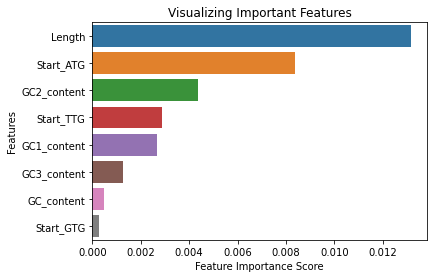

In [80]:
%matplotlib inline

features_condensed = features_condensed.squeeze().sort_values(ascending=False)

# Creating a bar plot
sns.barplot(x = features_condensed, y = features_condensed.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Visualization

In [81]:
feature_imp = pd.Series(clf_rand.feature_importances_, index = feature_names).sort_values(ascending=False)

In [82]:
selected = feature_imp.iloc[0:15]

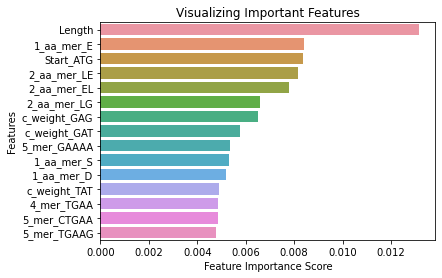

In [83]:
%matplotlib inline

# Creating a bar plot
sns.barplot(x = selected, y = selected.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()

#plt.savefig('feature_imp_g1_uneven.png', dpi=300, bbox_inches='tight', transparent=True)

## Generating the model on selected features

After removing the least important features the accuracy may increase. This is because one removes misleading data and noise, resulting in increased accuracy. A lesser amount of features also reduces the training time.

In [84]:
selected = feature_imp.iloc[0:200]

In [85]:
selected_feat = list(selected.index)

In [86]:
important_indices = [feature_names.index(x) for x in selected_feat]

In [87]:
# Create a Gaussian Classifier
clf_imp = RandomForestClassifier(n_estimators=1000, max_features='auto', 
                             max_depth=70, bootstrap=False, random_state = 42)

# Select most important features
important_indices = [feature_names.index(x) for x in selected_feat]

train_important = train_x[:, important_indices]
test_important = test_x[:, important_indices]

In [88]:
# Train the random forest
clf_imp.fit(train_important, train_y)

RandomForestClassifier(bootstrap=False, max_depth=70, n_estimators=1000,
                       random_state=42)

In [89]:
# Make predictions and determine the error
pred_y = clf_imp.predict(test_important)

# Model Accuracy, how often is the classifier correct?
print("Accuracy score:", metrics.accuracy_score(test_y, pred_y))
# Precision, Recall and Roc_AUC score
print("Precision score:", metrics.precision_score(test_y, pred_y))
print("Recall score:", metrics.recall_score(test_y, pred_y))
print("ROC_AUC score:", metrics.roc_auc_score(test_y, pred_y))

Accuracy score: 0.9045
Precision score: 0.9063116370808678
Recall score: 0.9054187192118227
ROC_AUC score: 0.9044860093521042


#### Confusion matrix

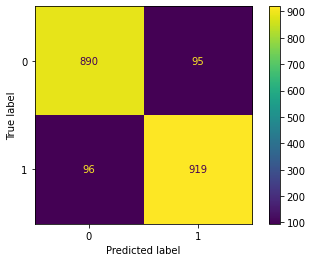

In [90]:
plot_confusion_matrix(clf_imp, test_important, test_y)  
plt.show()

#plt.savefig('confmatrix_g1_bestmod_uneven.png', dpi=300, bbox_inches='tight', transparent=True)